<a href="https://colab.research.google.com/github/chelseiji/Data2000HW/blob/main/HWLinearModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models

This homework is due on or before Tuesday 24 October, 11:59pm Eastern time. Publish your code to GitHub and provide a link to it in your Canvas submission.

For this problem set, we will use the Craigslist used vehicle dataset from our 03 Oct lab. As a reminder, you can load it into your development environment with:

```python
import pandas as pd

car_data_raw = pd.read_csv("https://cdn.c18l.org/vehicles_lab.csv")
```

## Part 1: Feature Selection

Our dataset contains the following features:
  - region
  - price
  - year
  - manufacturer
  - model
  - condition
  - cylinders
  - fuel
  - odometer
  - title_status
  - transmission
  - drive
  - size
  - type
  - paint_color
  - description
  - state
  - lat
  - long
  - posting_date

`price` is the column we will use as our label; the remaining columns are all possible inputs to our model.

**Create a dataframe with `price` and between 5 and 7 additional columns from our original dataset that you want to use as features for a predictive model. Explain your choices.**

## Part 2: Data Cleaning

Based on the dataset that you created for Part 1, **normalize any numeric features, dummy- or one-hot encode any categorical features, and remove any outliers or spurious records. Explain your choices.**

## Part 3: Feature Engineering

Based on the dataset that you created for Part 2, **create two or more new engineered feature columns and explain why you chose to create these.**

## Part 4: Multinomial classification

Based on the dataset that you created for Part 3:

  - Create a new `price_bin` column that bins vehicle price into $10,000 bands. E.g., `$0-$9,999`, `$10,000-19,999`, and so forth. Use [the `cut()` function](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) in Pandas to do this;
  - Split your dataset into training and testing samples at an 80:20 ratio;
  - Train a multinomial logistic regression model to predict which price band each car will fall into. Use [scikit-learn's LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to do this. For a multinomial classification problem, use the `multi_class='multinomial'` parameter when fitting your model.

**What is your model's accuracy on both the training and testing datasets?** You can use [scikit-learn's accuracy_score() function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) to determine this.

Multinomial classification

In [2]:
import pandas as pd

car_data_raw = pd.read_csv("https://cdn.c18l.org/vehicles_lab.csv")

car_data_raw.describe()

,price,year,odometer,lat,long
count,1.926560e+05,192656.000000,1.913700e+05,187764.000000,187764.000000
mean,4.461591e+04,2010.488373,1.043173e+05,38.846477,-95.687570
std,8.901148e+06,9.532939,1.973268e+05,6.002768,18.836962
min,0.000000e+00,1900.000000,0.000000e+00,-84.122245,-159.719900
25%,5.500000e+03,2007.000000,4.859150e+04,35.069568,-115.090200
50%,1.199500e+04,2013.000000,9.506650e+04,39.555745,-89.727600
75%,2.450000e+04,2016.000000,1.400000e+05,42.595900,-81.125200
max,3.736929e+09,2022.000000,1.000000e+07,82.252826,139.691700


In [3]:
car_data_raw.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,lat,long,posting_date
0,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.5920,-85.518900,2021-05-03T14:02:03-0500
1,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,NaN,pickup,black,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-03T13:41:25-0500
2,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,NaN,pickup,silver,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-03T12:41:33-0500
3,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,NaN,truck,grey,Selling my 2019 Toyota Tacoma TRD Off Road Dou...,al,32.6013,-85.443974,2021-05-03T12:12:59-0500
4,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-03T11:31:14-0500


In [4]:
car_data_raw.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'description', 'state', 'lat',
       'long', 'posting_date'],
      dtype='object')

In [5]:
car_data_raw.loc[0:10, 'description']

0     2013 F-150 XLT V6 4 Door. Good condition. Leve...
1     Carvana is the safer way to buy a car During t...
2     Carvana is the safer way to buy a car During t...
3     Selling my 2019 Toyota Tacoma TRD Off Road Dou...
4     Carvana is the safer way to buy a car During t...
5     Carvana is the safer way to buy a car During t...
6     Carvana is the safer way to buy a car During t...
7     Carvana is the safer way to buy a car During t...
8     Carvana is the safer way to buy a car During t...
9     Here I have a unmolested Ford F-250 6.0 power ...
10    Readily available. Excellent condition, clean ...
Name: description, dtype: object

In [6]:
new_car_data = car_data_raw.loc[:, [
    'price', 'year', 'manufacturer', 'fuel', 'condition',
    'odometer', 'title_status', 'posting_date'
    ]]

I chose these additional columns for my data set since I believe that prospective buyers of cars would like to know this kind of information. The condition, odometer, and ttle taus are things that many look for. The posting date is imortnt as well as people would like to see how long it has been on the market. The year, manufacturer, fuel, and price are all basic in formation that anyone should know when getting a vehicle

In [7]:
new_car_data.head()

,price,year,manufacturer,fuel,condition,odometer,title_status,posting_date
0,15000,2013.0,ford,gas,excellent,128000.0,clean,2021-05-03T14:02:03-0500
1,27990,2012.0,gmc,gas,good,68696.0,clean,2021-05-03T13:41:25-0500
2,34590,2016.0,chevrolet,gas,good,29499.0,clean,2021-05-03T12:41:33-0500
3,35000,2019.0,toyota,gas,excellent,43000.0,clean,2021-05-03T12:12:59-0500
4,29990,2016.0,chevrolet,gas,good,17302.0,clean,2021-05-03T11:31:14-0500


Part 2: Data Cleaning

In [8]:
new_car_data = new_car_data.loc[new_car_data['price']>0]
new_car_data.head()

,price,year,manufacturer,fuel,condition,odometer,title_status,posting_date
0,15000,2013.0,ford,gas,excellent,128000.0,clean,2021-05-03T14:02:03-0500
1,27990,2012.0,gmc,gas,good,68696.0,clean,2021-05-03T13:41:25-0500
2,34590,2016.0,chevrolet,gas,good,29499.0,clean,2021-05-03T12:41:33-0500
3,35000,2019.0,toyota,gas,excellent,43000.0,clean,2021-05-03T12:12:59-0500
4,29990,2016.0,chevrolet,gas,good,17302.0,clean,2021-05-03T11:31:14-0500


<Axes: >

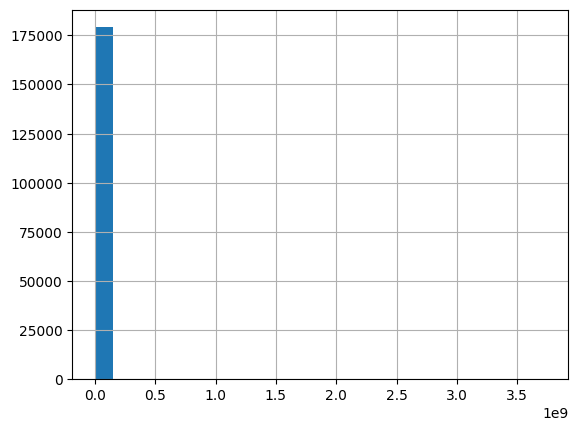

In [9]:
new_car_data['price'].hist(bins=25)

<Axes: >

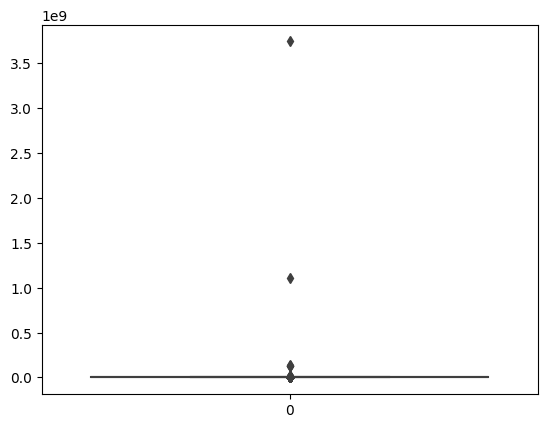

In [10]:
import seaborn as sns
sns.boxplot(new_car_data['price'])

In [11]:
new_car_data = new_car_data.loc[new_car_data['price']>0]
new_car_data = new_car_data.loc[ new_car_data['price']<48000]
new_car_data = new_car_data.loc[ new_car_data['odometer']>0]
new_car_data = new_car_data.loc[ new_car_data['odometer']<100000]
new_car_data = new_car_data.loc[ new_car_data['year']>2010]

I chose to have the prieces greater than 0, and less than 48000 since it reduces the chnace of outliers being present in the new data. For the odometer I also chose less than 100000.
I chose the years above 2010 since I think people would like cars that ar eonly slightly older than 10 years old.

In [12]:
temp = pd.get_dummies(new_car_data['condition'], dummy_na=True).astype(int)

In [13]:
temp.head()

,excellent,fair,good,like new,new,salvage,NaN
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0
5,0,0,1,0,0,0,0


In [14]:
new_data = pd.concat([new_car_data, temp], axis=1)
new_data.head()

,price,year,manufacturer,fuel,condition,odometer,title_status,posting_date,excellent,fair,good,like new,new,salvage,NaN
1,27990,2012.0,gmc,gas,good,68696.0,clean,2021-05-03T13:41:25-0500,0,0,1,0,0,0,0
2,34590,2016.0,chevrolet,gas,good,29499.0,clean,2021-05-03T12:41:33-0500,0,0,1,0,0,0,0
3,35000,2019.0,toyota,gas,excellent,43000.0,clean,2021-05-03T12:12:59-0500,1,0,0,0,0,0,0
4,29990,2016.0,chevrolet,gas,good,17302.0,clean,2021-05-03T11:31:14-0500,0,0,1,0,0,0,0
5,38590,2011.0,chevrolet,gas,good,30237.0,clean,2021-05-03T07:50:35-0500,0,0,1,0,0,0,0


In [15]:
temp2 = pd.get_dummies(new_car_data['title_status'], dummy_na=True).astype(int)

In [16]:
temp2.head()

,clean,lien,missing,parts only,rebuilt,salvage,NaN
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
5,1,0,0,0,0,0,0


In [17]:
new_data = pd.concat([new_car_data, temp2,], axis=1)
new_data.head()

,price,year,manufacturer,fuel,condition,odometer,title_status,posting_date,clean,lien,missing,parts only,rebuilt,salvage,NaN
1,27990,2012.0,gmc,gas,good,68696.0,clean,2021-05-03T13:41:25-0500,1,0,0,0,0,0,0
2,34590,2016.0,chevrolet,gas,good,29499.0,clean,2021-05-03T12:41:33-0500,1,0,0,0,0,0,0
3,35000,2019.0,toyota,gas,excellent,43000.0,clean,2021-05-03T12:12:59-0500,1,0,0,0,0,0,0
4,29990,2016.0,chevrolet,gas,good,17302.0,clean,2021-05-03T11:31:14-0500,1,0,0,0,0,0,0
5,38590,2011.0,chevrolet,gas,good,30237.0,clean,2021-05-03T07:50:35-0500,1,0,0,0,0,0,0


In [18]:
new_data.describe()

,price,year,odometer,clean,lien,missing,parts only,rebuilt,salvage,NaN
count,70316.000000,70316.000000,70316.000000,70316.000000,70316.000000,70316.000000,70316.000000,70316.000000,70316.000000,70316.000000
mean,23040.579271,2016.034132,50530.190995,0.922493,0.006400,0.000128,0.000071,0.038014,0.013880,0.019014
std,11761.008793,2.451631,28156.407319,0.267397,0.079742,0.011313,0.008432,0.191232,0.116995,0.136576
min,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13999.000000,2014.000000,26975.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22909.000000,2016.000000,48752.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32500.000000,2018.000000,74933.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,47999.000000,2022.000000,99999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Part 3

In [19]:
new_data['is_excellent'] = new_car_data['condition'].str.contains('excellent')
new_data['is_clean'] = new_car_data['title_status'].str.contains('clean')
new_data.head()

,price,year,manufacturer,fuel,condition,odometer,title_status,posting_date,clean,lien,missing,parts only,rebuilt,salvage,NaN,is_excellent,is_clean
1,27990,2012.0,gmc,gas,good,68696.0,clean,2021-05-03T13:41:25-0500,1,0,0,0,0,0,0,False,True
2,34590,2016.0,chevrolet,gas,good,29499.0,clean,2021-05-03T12:41:33-0500,1,0,0,0,0,0,0,False,True
3,35000,2019.0,toyota,gas,excellent,43000.0,clean,2021-05-03T12:12:59-0500,1,0,0,0,0,0,0,True,True
4,29990,2016.0,chevrolet,gas,good,17302.0,clean,2021-05-03T11:31:14-0500,1,0,0,0,0,0,0,False,True
5,38590,2011.0,chevrolet,gas,good,30237.0,clean,2021-05-03T07:50:35-0500,1,0,0,0,0,0,0,False,True


Here I created two engineered features which decribe wheteher a car is in excellent condition and wheter a cars titile stautus is clean.

Part 4

In [20]:
new_data['price_bin'] = pd.cut(x=new_data['price'], bins=[0,10000,20000,30000,48000])

In [21]:
new_data.head()

,price,year,manufacturer,fuel,condition,odometer,title_status,posting_date,clean,lien,missing,parts only,rebuilt,salvage,NaN,is_excellent,is_clean,price_bin
1,27990,2012.0,gmc,gas,good,68696.0,clean,2021-05-03T13:41:25-0500,1,0,0,0,0,0,0,False,True,"(20000, 30000]"
2,34590,2016.0,chevrolet,gas,good,29499.0,clean,2021-05-03T12:41:33-0500,1,0,0,0,0,0,0,False,True,"(30000, 48000]"
3,35000,2019.0,toyota,gas,excellent,43000.0,clean,2021-05-03T12:12:59-0500,1,0,0,0,0,0,0,True,True,"(30000, 48000]"
4,29990,2016.0,chevrolet,gas,good,17302.0,clean,2021-05-03T11:31:14-0500,1,0,0,0,0,0,0,False,True,"(20000, 30000]"
5,38590,2011.0,chevrolet,gas,good,30237.0,clean,2021-05-03T07:50:35-0500,1,0,0,0,0,0,0,False,True,"(30000, 48000]"


In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(
    new_data,
    train_size=0.8,
    random_state=42)

model = LinearRegression(multi_class='multinomial' ).fit(
    X=train_data.loc[:, [
        'odometer', 'year', 'manufacturer', 'clean',
        'lien', 'fuel', 'missing', 'parts only',
        'rebuilt', 'title_status', 'salvage', 'is_excellent',
        'is_clean', 'price_bin','posting_date']],
    y=train_data['price']
)

SyntaxError: ignored

In [24]:
from sklearn.metrics import accuracy_score

train_data.accuracy_score(x, y,  normalize=True, sample_weight=None)
test_data.accuracy_score(y, x,  normalize=True, sample_weight=None)


SyntaxError: ignored